<a href="https://colab.research.google.com/github/veenamekkatt/DSA_Assignments/blob/main/Case_STudy_7_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Case study on Supervised learning


Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)


In [32]:
# Import all libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

# 1. Read the dataset to the python environment. 

In [4]:
data = pd.read_excel("/content/iris.xls")
data.shape

(150, 5)

In [5]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# 2. Do necessary pre-processing steps.

In [10]:
#Let's look for any null values to find out whether there needs to be null values.

data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [26]:
columns_with_na_dropped = data.dropna()

In [27]:
data.shape


(150, 5)

In [28]:
columns_with_na_dropped.shape

(131, 5)

In [33]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [39]:
data['SL'] = data['SL'].fillna(st.mode(data['SL'])) 
data['SW'] = data['SW'].fillna(st.mode(data['SW'])) 
data['PL'] = data['PL'].fillna(st.mode(data['PL'])) 
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [41]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

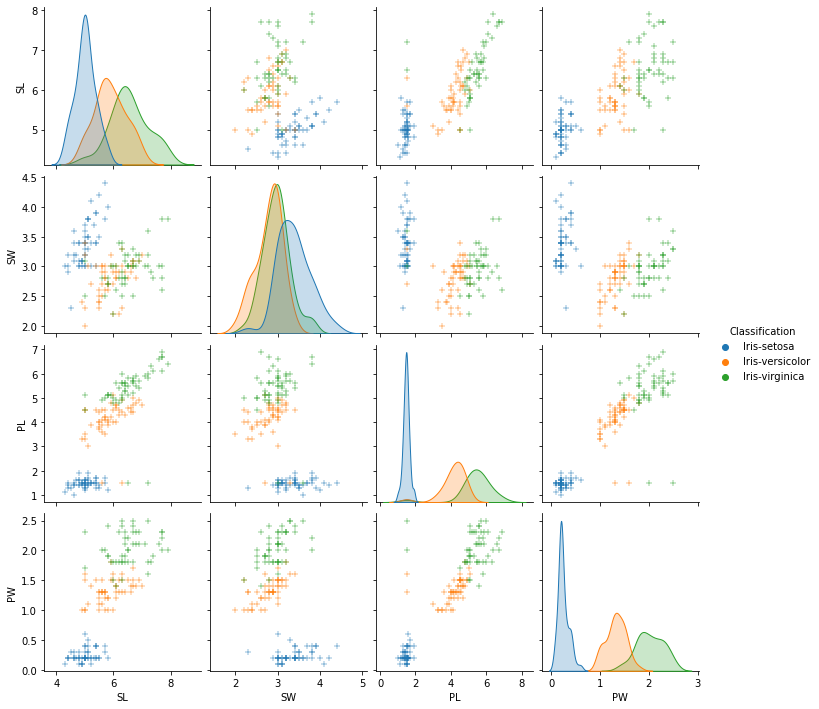

In [45]:
g = sns.pairplot(data, hue='Classification', markers='+')
plt.show()

In [46]:
iris1=data

After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

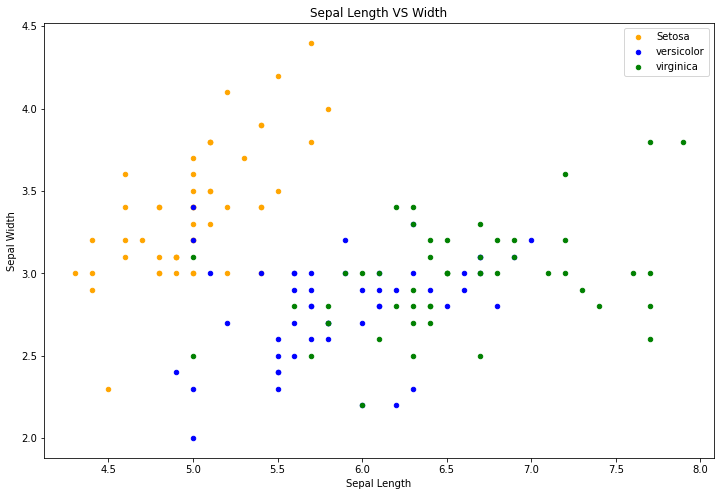

In [50]:
#Visualization1 : Sepal Length VS Width
#This graph shows relationship between the sepal length and sepal width.
fig = iris1[iris1.Classification=='Iris-setosa'].plot(kind='scatter',x='SL',y='SW',color='orange', label='Setosa')
iris1[iris1.Classification=='Iris-versicolor'].plot(kind='scatter',x='SL',y='SW',color='blue', label='versicolor',ax=fig)
iris1[iris1.Classification=='Iris-virginica'].plot(kind='scatter',x='SL',y='SW',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

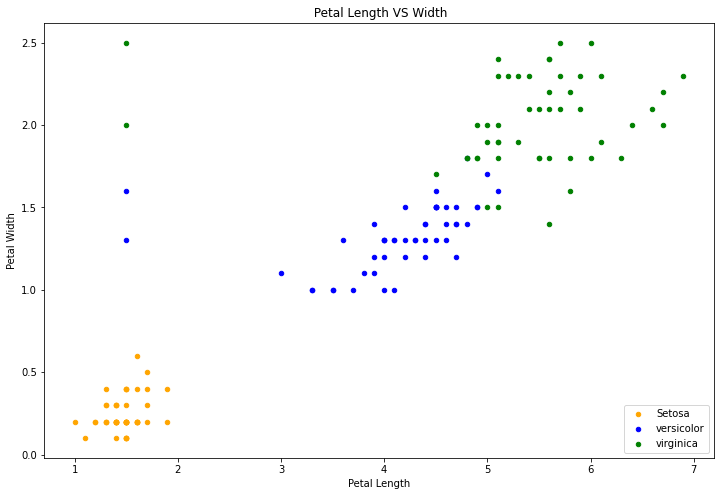

In [51]:
#Visualization2 : Sepal Length VS Width

fig = iris1[iris1.Classification=='Iris-setosa'].plot.scatter(x='PL',y='PW',color='orange', label='Setosa')
iris1[iris1.Classification=='Iris-versicolor'].plot.scatter(x='PL',y='PW',color='blue', label='versicolor',ax=fig)
iris1[iris1.Classification=='Iris-virginica'].plot.scatter(x='PL',y='PW',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()


As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

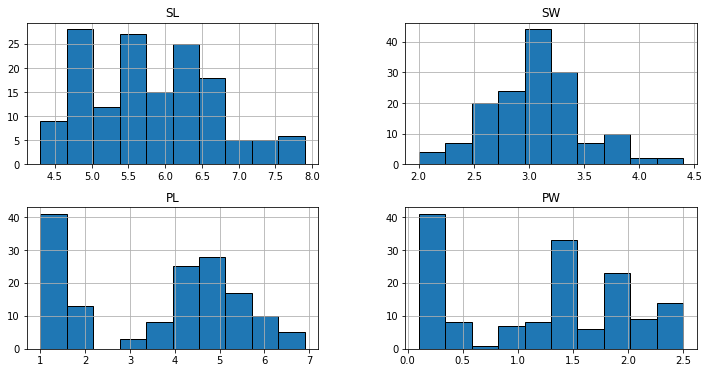

In [52]:
iris1.hist(edgecolor='black')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

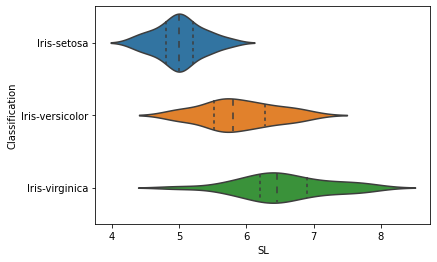

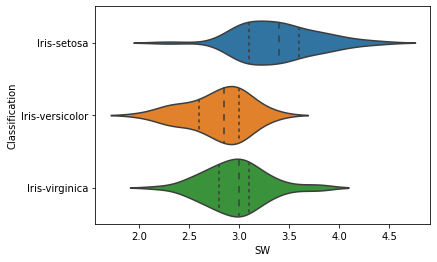

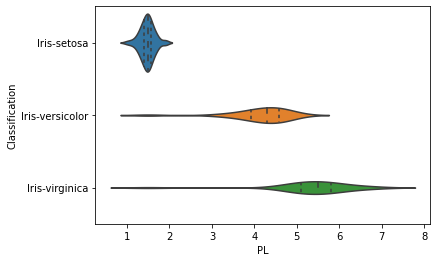

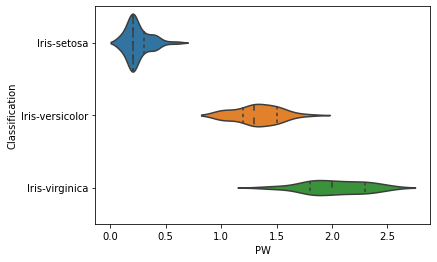

In [54]:
g = sns.violinplot(y='Classification', x='SL', data=iris1, inner='quartile')
plt.show()
g = sns.violinplot(y='Classification', x='SW', data=iris1, inner='quartile')
plt.show()
g = sns.violinplot(y='Classification', x='PL', data=iris1, inner='quartile')
plt.show()
g = sns.violinplot(y='Classification', x='PW', data=iris1, inner='quartile')
plt.show()

# 3.1 Find out which classification model gives the best result to predict iris species


In [ ]:
#Attributes -  In the given dataset, the attributes are the petal and sepal length and width

#Target Variable -  Here the target variables are the 3 flower species.

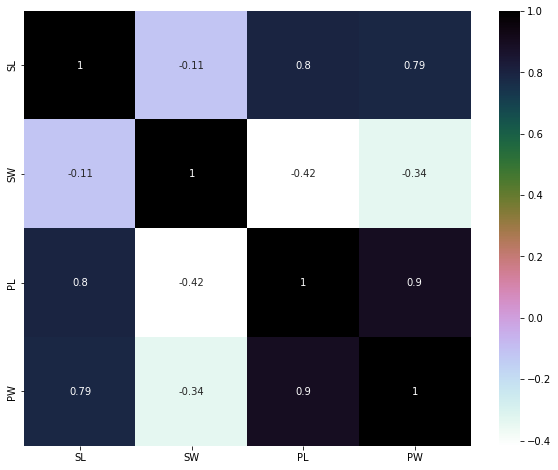

In [55]:
# Correlation 
plt.figure(figsize=(10,8)) 
sns.heatmap(iris1.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

We can see that there is a very high correlation between Petal Length and Petal Width.



In [58]:
#Identifying traning and test data

X = data.drop(['Classification'], axis=1)
y = data['Classification']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [60]:
from sklearn.model_selection import train_test_split  #to split the dataset for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [109]:
from sklearn import metrics
print("accuracy is",accuracy_score(y_test,y_pred))
print("precision is",metrics.precision_score(y_test,y_pred, average='macro'))
print("recall is",metrics.recall_score(y_test,y_pred, average='micro'))
print("f1 score is",metrics.f1_score(y_test,y_pred, average='weighted'))

accuracy is 0.9555555555555556
precision is 0.9592592592592593
recall is 0.9555555555555556
f1 score is 0.9555555555555556


For a good model , accuracy and fi score should be maximum

In [111]:
#for a good model f1 score and accuracy should be maximum

metrics.confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 17]])


Classification algorithms

    Logistic Regression
    Decision Tree
    Support Vector Machine (SVM)
    K-Nearest Neighbours




In [61]:
# Importing alll the necessary packages to use the various classification algorithms

from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import metrics #for checking the model accuracy

Logistic Regression

In [62]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
acc_log = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Logistic Regression is', acc_log)

The accuracy of the Logistic Regression is 0.9777777777777777


Decision Tree

In [65]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Decision Tree is', acc_dt)

The accuracy of the Decision Tree is 0.9777777777777777


Support Vector Machine (SVM)


In [63]:
sv = svm.SVC() #select the algorithm
sv.fit(X_train,y_train) # we train the algorithm with the training data and the training output
y_pred = sv.predict(X_test) #now we pass the testing data to the trained algorithm
acc_svm = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the SVM is:', acc_svm)

The accuracy of the SVM is: 0.9777777777777777


K-Nearest Neighbours

In [64]:
knc = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc_knn = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the KNN is', acc_knn)

The accuracy of the KNN is 0.9555555555555556


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7fc43b828dd0>,
 <a list of 10 Text major ticklabel objects>)

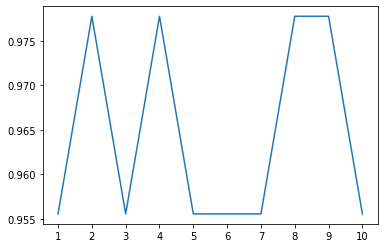

In [66]:
a_index = list(range(1,11))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    kcs = KNeighborsClassifier(n_neighbors=i) 
    kcs.fit(X_train,y_train)
    y_pred = kcs.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_pred,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

In [67]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machines',
              'K-Nearest Neighbours'],
    'Score': [acc_log, acc_dt, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.977778
1,Decision Tree,0.977778
2,Support Vector Machines,0.977778
3,K-Nearest Neighbours,0.955556


# 3.2 Random Forest algoritham

In [70]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#random forest

In [69]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [78]:
from sklearn import datasets

classification_idx = clf.predict([[3, 5, 4, 2]])[0]
classification_idx

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


'Iris-virginica'

In [90]:
# Feature importance
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index= ['SL', 'SW', 'PL', 'PW']).sort_values(ascending=False)
feature_imp

PW    0.512272
PL    0.318153
SL    0.130034
SW    0.039541
dtype: float64

No handles with labels found to put in legend.


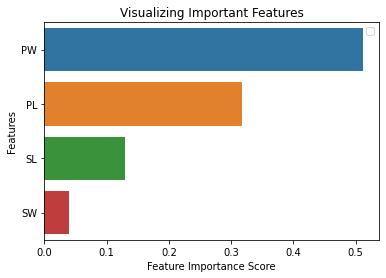

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [94]:
# Removing Sepal width as it is less important


# Split dataset into features and labels
X=data[['PL', 'PW','SL']]  # Removed feature "sepal width"
y=data['Classification']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [95]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556
